In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

# Lab 6: Deep learning

# Intro to Tensorflow/Keras.


* [TensorFlow](https://www.tensorflow.org/) is an open-source machine learning library for research and production.
* [Keras ](https://keras.io/)is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.
* In this lab we will work with the tensorflow implementation of the keras api: [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras)


# Task 1. Image classification with MLP's

## The MNIST dataset
The MNIST dataset is a collection of handwritten digits. Let's explore the dataset.

In [0]:
# import dataset and normalize

mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # scaling the data

The dataset contains square images. Let's see a few examples:

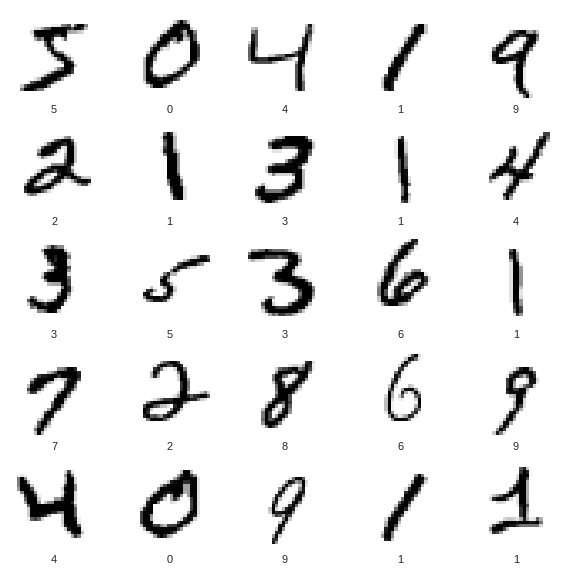

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])


Find out whether the dataset is balanced. Make a bar plot of the count of samples of each class.

<Container object of 10 artists>

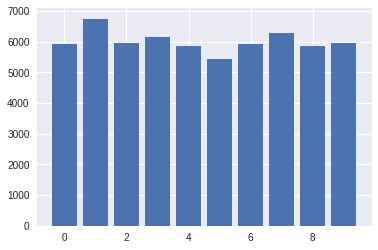

In [4]:
labels, counts = np.unique(y_train, return_counts=True)
fig, ax = plt.subplots()
ax.bar(labels, counts )

## Neural Network Models
Most neural networks are defined as a stack of connected layers. We can create models like this using the [keras Sequential model API](https://keras.io/getting-started/sequential-model-guide/). Below there is an example of a very simple network, with only one hidden layer, with all nodes connected. We call those dense layers, or fully connected layers.

In [5]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = x_train.shape[1:]), #the first layer always need the input_shape param
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.6513 - acc: 0.8356
Epoch 2/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.3404 - acc: 0.9046
Epoch 3/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.2929 - acc: 0.9166
Epoch 4/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.2636 - acc: 0.9253
Epoch 5/5
10000/10000 [==============================] - 1s 66us/step


[0.22211201519668103, 0.9382]

Try to improve your model by adding dropout layers. Try also to add more dense layers with more neurons.

See also:
- https://keras.io/regularizers/
- https://keras.io/initializers/
- https://keras.io/optimizers/



In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = x_train.shape[1:]), #the first layer always need the input_shape param
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.7999 - acc: 0.7580
Epoch 2/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.3924 - acc: 0.8842
Epoch 3/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.3197 - acc: 0.9060
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2724 - acc: 0.9200
Epoch 5/5
10000/10000 [==============================] - 1s 76us/step


[0.16468897679001093, 0.9511]

The model did improve a little, but let's try to simply train longer.

In [10]:
model.fit(x_train, y_train, epochs=15)
model.evaluate(x_test, y_test)

Epoch 1/15
60000/60000 [==============================] - 7s 122us/step - loss: 0.2213 - acc: 0.9357
Epoch 2/15
60000/60000 [==============================] - 7s 125us/step - loss: 0.2019 - acc: 0.9407
Epoch 3/15
60000/60000 [==============================] - 7s 124us/step - loss: 0.1899 - acc: 0.9444
Epoch 4/15
60000/60000 [==============================] - 7s 124us/step - loss: 0.1755 - acc: 0.9479
Epoch 5/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.1649 - acc: 0.9513
Epoch 6/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.1560 - acc: 0.9549
Epoch 7/15
60000/60000 [==============================] - 7s 122us/step - loss: 0.1496 - acc: 0.9557
Epoch 8/15
60000/60000 [==============================] - 7s 125us/step - loss: 0.1427 - acc: 0.9569
Epoch 9/15
60000/60000 [==============================] - 8s 125us/step - loss: 0.1340 - acc: 0.9605
Epoch 10/15
60000/60000 [==============================] - 8s 125us/step - loss: 0.1323 - a

[0.08335714377928526, 0.9738]

In [21]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
38048/60000 [==================>...........] - ETA: 3s - loss: 0.3676 - acc: 0.8926

KeyboardInterrupt: ignored

# Task 2 . Image classification with CNN
Convolution Neural Networks are very suited for images. A convolution acts as a pattern recognition. It looks only in a small region of pixels (3x3 or 5x5). The layers now are no longer fully connected, but a neuron is connected only with a few neurons.

Take a look at these useful links:
* https://medium.com/@eternalzer0dayx/demystifying-convolutional-neural-networks-ca17bdc75559

* http://cs231n.github.io/convolutional-networks/

* https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

Classify the mnist dataset using only convolutional layers (2 layers with about 30 to 40 filters should be enough) followed by a dense layer with a softmax activation.

We will use the [keras 2D Convolution layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

In [24]:
mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = (28,28,1), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = (28,28,32), activation='relu', padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                250890    
Total params: 260,458
Trainable params: 260,458
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.4156 - acc: 0.8790
Epoch 2/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.2484 - acc: 0.9294
Epoch 3/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.1387 - acc: 0.9614
Epoch 4/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0907 - acc: 0.9740
Epoch 5/5
10000/10000 [==============================] - 1s 95us/step


[0.06517070640716702, 0.9796]

Try to improve your model by adding pooling and dropout layers.

In [28]:
mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = (28,28,1), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), input_shape = (14,14,32), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), input_shape = (7,7,32), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          36928     
__________

In [29]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.8082 - acc: 0.7372
Epoch 2/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.2215 - acc: 0.9311
Epoch 3/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.1630 - acc: 0.9490
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.1352 - acc: 0.9583
Epoch 5/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.1197 - acc: 0.9634
Epoch 6/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.1055 - acc: 0.9670
Epoch 7/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0961 - acc: 0.9694
Epoch 8/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0886 - acc: 0.9718
Epoch 9/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0808 - acc: 0.9751
Epoch 10/10
10000/10000 [==============================] - 1s 104us/step


[0.03932789149903692, 0.9874]

Use the function bellow to visualize the activations of the different layers in your model.

In [0]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[10].reshape(1,28,28,1)) #change the index for x_train[index] to use another image

#when you call the function, col_size*row_size must be equal to the number of filters in that conv layer
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index] #act_index is the index of the layer eg. 0 is the first layer
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*5,col_size*5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

Activations in the first layer:

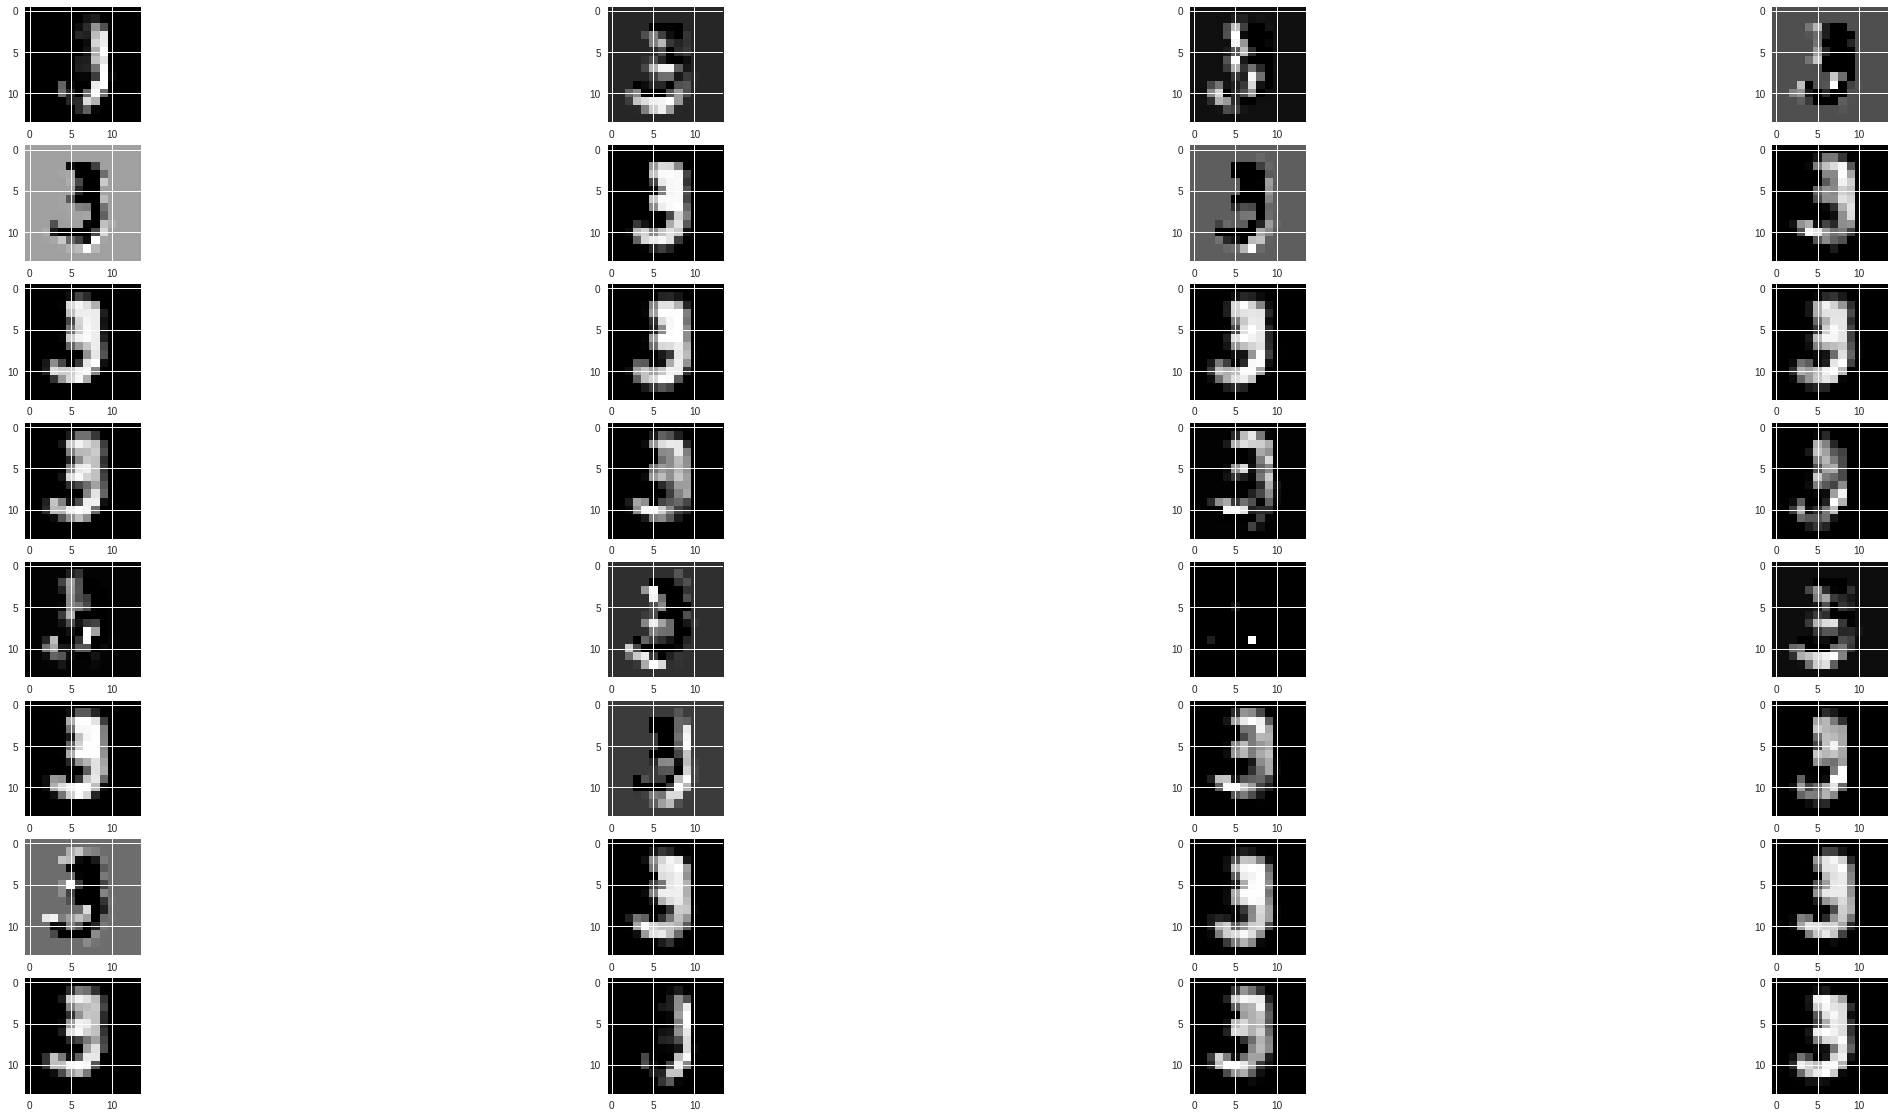

In [33]:
display_activation(activations, 4, 8, 1)

Do the same things as above on the cifar10 dataset, which is a dataset composed of 32x32 color images split into 10 categories

In [0]:
cifar10 = keras.datasets.cifar10

# Task 3. Adding numbers with RNN's

Before you start, take a look at these usefull links.
* http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/
* http://www.wildml.com/2015/10/recurrent-neural-networks-tutorial-part-3-backpropagation-through-time-and-vanishing-gradients/

* http://www.wildml.com/2015/10/recurrent-neural-network-tutorial-part-4-implementing-a-grulstm-rnn-with-python-and-theano/

* http://colah.github.io/posts/2015-08-Understanding-LSTMs/

Below, you have a function that generates pairs of ints as the datapoins and their sum as their label

In [0]:
def gen_data(n = 10000, max_num = 10**2):
  X = []
  Y = []
  for i in range(n):
    a = np.random.randint(max_num)
    b = np.random.randint(max_num)
    s = a + b    
    x , y = np.array([a,b]) , s
    X.append(x)
    Y.append(y)
  return np.array(X).reshape(n,2,1) , np.array(Y)

X , Y = gen_data()

In [0]:
print(X[0])
print(Y[0])
print(X.shape)
print(Y.shape)

[[47]
 [15]]
62
(10000, 2, 1)
(10000,)


Try to make a neural network that contains at least an RNN(or LSTM,GRU) layer that learns how to add those numbers.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.RNN("..."))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='....', loss = '...')
model.summary()

In [0]:
N = 50000
x, y = gen_samples(N)
model.fit(x, y, batch_size=200, epochs=50)

RNN's as you know are good at sequence data, but the previous dataset was not really a sequence.

Below you have a function that generates pairs of ints and their sum but now as one-hot encoded  sequences

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def gen_sequence_data(n = 10000,max_lenght = 2):
  X = np.zeros((n, (max_lenght+1)*2, 10))
  Y = np.zeros((n, max_lenght+1, 10))
  for i in range(n):
    a = np.random.randint(10**max_lenght)
    b = np.random.randint(10**max_lenght)
    s = a + b
    a = [int(i) for i in str(a)]
    b = [int(i) for i in str(b)]
    s = [int(i) for i in str(s)]
    a,b,s = pad_sequences([a,b,s],maxlen = max_lengh + 1)
    x , y = np.concatenate([a,b]) , s
    for j, char in enumerate(x):
         X[i, j, char] = 1

    for j, char in enumerate(s):
         Y[i, j, char] = 1

  return X,Y

X , Y = gen_sequence_data()

In [0]:
print(X[0])
print(Y[0])
print(X.shape)
print(Y.shape)

* Try to make an RNN model that learns how to add numbers encoded this way. 
* This will be a true sequence to sequence model.
* Hint: encoder-decoder